<div class="title">Keras Case Study</div>
<div class="subtitle">Máster en Big Data y Data Science</div>
<div class="author">Profesor: Carlos María Alaíz Gudín &mdash; Universidad Autónoma de Madrid</div>

---
<div style="font-size: large; font-weight: bold; margin-left: 6em;"><p>Name: <u>Merve Celik Cakiroglu</u></div>


**Configuration**

This cell defines the general configuration of Jupyter Notebook.

In [ ]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

In [ ]:
# from google.colab import drive
# drive.mount(r'/content/drive')

In [ ]:
# cd 'drive/My Drive/Colab Notebooks'

This cell imports the packages to be used.

In [ ]:
# Standard packages.
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Initialisations.
matplotlib.rc("figure", figsize=(15, 5))

# Keras Case Study

## Introduction

This case study is based on a dataset of labelled images belonging to one of four different categories: `cloudy`, `rain`, `shine` and `sunrise`.

### Goal

<div class="qst">

* Create a Keras model that allows to determine, from a test image, its correct class.
    * A minimum training accuracy of $94\%$ is required.
      Once it is achieved, the training should stop.
    * Given the complexity of the problem, it is required to:
        * Try different optimizers.
        * Try different learning rates.
        * Change the number of epochs, the size of the batches, the number of steps per epoch...
        * Use different callbacks to make easier the experimentation (e.g., storing automatically the trained models).
    * The different experiments should be briefly described, analysing also the obtained results.

</div>

### Structure

The notebook is organised showing a possible path to tackle this problem (although there is no need of following strictly this particular order).

As a baseline and starting point, the dataset is loaded, and a linear model (a classification perceptron) is trained.

## Case Study Using Keras

### Data Load and Preprocessing

* Images loading.
* Images preprocessing.
    * Scale the images.
    * Guarantee consistent sizes.
* Generate new samples.
* Adjust batch size.

In [ ]:
# Parameters.
rescale = 1.0 / 255
image_size = (150, 150)
batch_size = 32

# The image generator can help to preprocess the images.

# In training, new samples can be generated by modifying this object.
# datagen_tr = ImageDataGenerator(rescale=rescale)
# # In test (and validation), new samples should not be added.
# datagen_te = ImageDataGenerator(rescale=rescale)

# # The data is already partitioned by folders, each class is in a different subfolder.
# # The following function returns iterators to each dataset.
# data_tr = datagen_tr.flow_from_directory(
#     "data/train/", target_size=image_size, batch_size=batch_size
# )
# data_va = datagen_te.flow_from_directory(
#     "data/validation/",
#     target_size=image_size,
# )
# data_te = datagen_te.flow_from_directory(
#     "data/test/",
#     target_size=image_size,
# )


################################################################################
# Insert code.
# Load the image data from the directories and create the data generators.
datagen_tr = ImageDataGenerator(
    rescale=rescale,
    rotation_range=20,  # Example: Rotate images up to 20 degrees
    width_shift_range=0.2,  # Example: Shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Example: Shift images vertically by 20% of the height
    shear_range=0.2,  # Example: Apply shear transformations
    zoom_range=0.2,  # Example: Zoom in/out by up to 20%
    horizontal_flip=True,  # Example: Flip images horizontally
    fill_mode="nearest",  # Example: Fill missing pixels with the nearest value
    data_format="channels_last"
)


datagen_te = ImageDataGenerator(rescale=rescale)


# Load data from directories
train_dir = "data/train/"
validation_dir = "data/validation/"
test_dir = "data/test/"

data_tr = datagen_tr.flow_from_directory(
    train_dir, target_size=image_size, batch_size=batch_size, shuffle=True, class_mode="categorical"
)

data_va = datagen_te.flow_from_directory(
    validation_dir, target_size=image_size, shuffle=False, class_mode="categorical"
)

data_te = datagen_te.flow_from_directory(
    test_dir, target_size=image_size, batch_size=batch_size, shuffle=False, class_mode="categorical"
)

# See the datasize
print("Training data size: ", data_tr.samples)
print("Validation data size: ", data_va.samples)
print("Test data size: ", data_te.samples)

################################################################################

Found 875 images belonging to 4 classes.
Found 110 images belonging to 4 classes.
Found 114 images belonging to 4 classes.
Training data size:  875
Validation data size:  110
Test data size:  114


Al definir rescale=1.0/255, rescalamos los valores de los píxeles en las imágenes del rango [0, 255] al rango [0, 1]. Establecemos el tamaño objetivo para las imágenes con image_size=(150, 150). Mediante batch_size, especificamos la cantidad de imágenes procesadas juntas por el modelo en cada paso de entrenamiento.

Implementamos técnicas de aumento de datos instantáneamente a nuestros datos de entrenamiento con ImageDataGenerator. Estas técnicas contribuyen a que el modelo se generalice mejor y evitan el sobreajuste.

- Giramos las imágenes aleatoriamente con rotation_range.
- Desplazamos las imágenes horizontalmente en ancho con width_shift_range.
- Desplazamos las imágenes verticalmente en altura con height_shift_range.
- Aplicamos transformaciones de corte aleatorias con shear_range.
- Acercamos/alejamos con zoom_range.
- Volteamos las imágenes horizontalmente con horizontal_flip.
- Finalmente, leemos las imágenes desde directorios con flow_from_director.

* Illustration of the dataset

Batch shape (input):  (32, 150, 150, 3)
Batch shape (target): (32, 4)


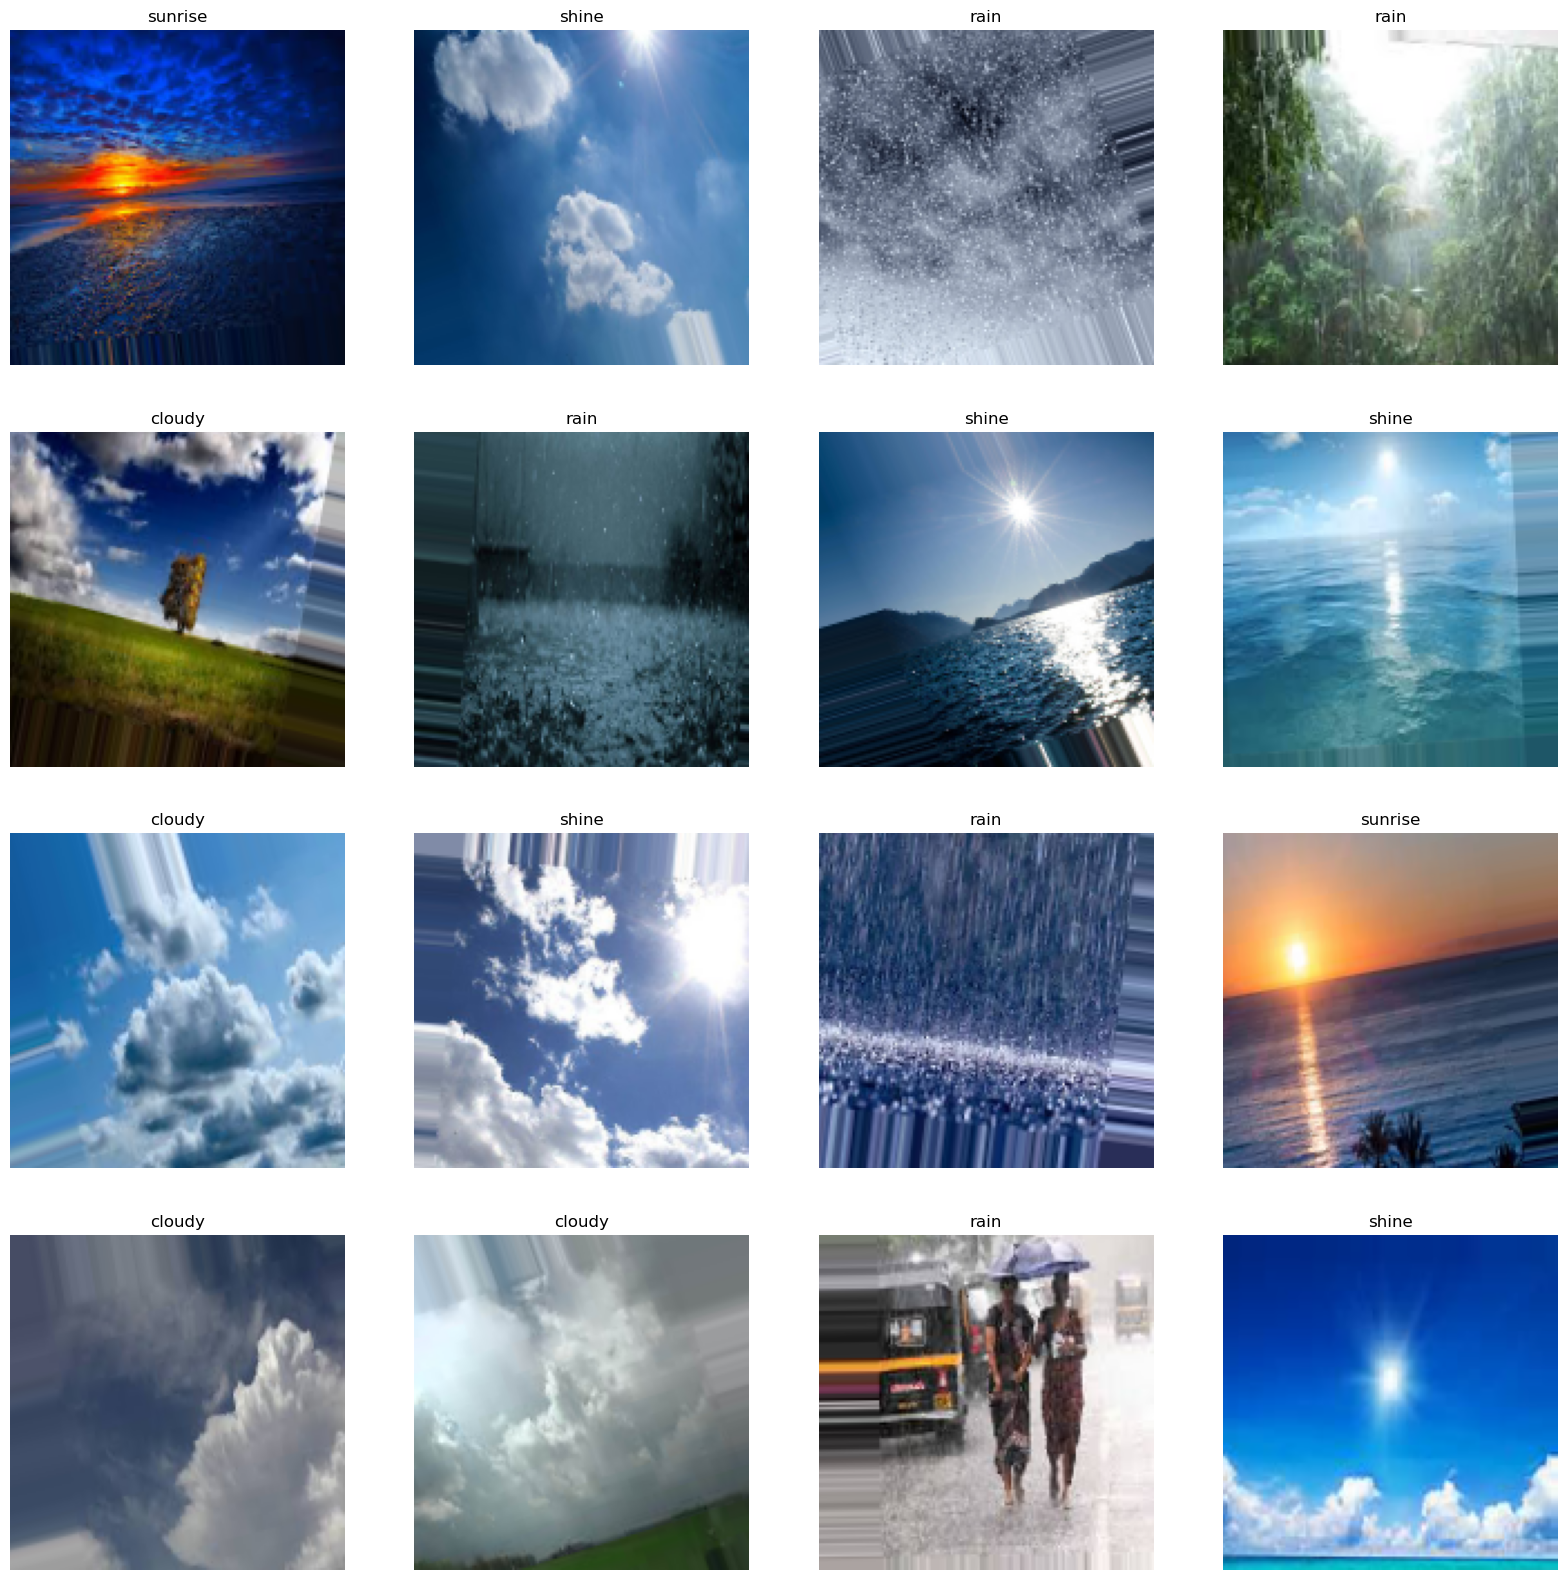

In [ ]:
classes = [k for k, v in data_tr.class_indices.items()]

n_rows = 4
n_cols = 4

for batch_x, batch_y in data_tr:
    print("Batch shape (input): ", batch_x.shape)
    print("Batch shape (target):", batch_y.shape)

    plt.figure(figsize=(20, 20))
    for c, x, y in zip(range(len(batch_x)), batch_x, batch_y):
        if c == n_rows * n_cols:
            break

        plt.subplot(n_rows, n_cols, c + 1)
        plt.imshow(x)
        plt.axis("off")
        plt.title(classes[np.where(y)[0][0]])

    plt.show()
    break

### Model Definition

* Adjust the architecture.

In [ ]:
# A simple perceptron is defined in this case.
# model = keras.Sequential(
#     [
#         keras.layers.Input(shape=(image_size[0], image_size[1], 3)),
#         keras.layers.Flatten(),
#         keras.layers.Dense(4, activation="softmax"),
#     ]
# )
# model.summary()

################################################################################
# Insert code.
# Build a deeper model
# Add dropout to prevent overfitting
model = keras.Sequential(
    [
        keras.layers.Input(shape=(image_size[0], image_size[1], 3)),

        keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(256, (3, 3), padding='same', activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),

        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(4, activation="softmax"),
    ]
)

model.summary()
################################################################################

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization_9 (Batc  (None, 150, 150, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 batch_normalization_10 (Bat  (None, 75, 75, 128)      512       
 chNormalization)                                                
                                                      

Establecemos el modelo de la siguiente manera:

- Extraemos características de las imágenes con Conv2D.
- Aumentamos la estabilidad del entrenamiento con Batch Normalization.
- Disminuimos la dimensionalidad de los datos con capas de Max Pooling.
- Evitamos el sobreajuste eliminando aleatoriamente unidades durante el entrenamiento con Dropout.
- Transformamos las matrices de características 2D en vectores 1D con Flatten.
- Calculamos las probabilidades para cada clase (4 clases) con Softmax.

### Model Compilation

* Adjust the optimizer.
* Adjust the learning rate.

In [ ]:
# model.compile(
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )

################################################################################
# Insert code.
# Compile the model
# Adjust the optimizer and learning rate
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-6),
    metrics=["accuracy"]
)

################################################################################

El modelo se compila de la siguiente manera:

- Definimos la función de pérdida con loss, ya que se trata de un problema de clasificación multiclase.
- Establecemos el optimizador Adam y la tasa de aprendizaje.
- Evaluamos la precisión del modelo durante el entrenamiento y la evaluación con metrics=[“accuracy”].

---

### Model Training

* Define callbacks.
* Adjust the number of epochs.
* Adjust the number of steps per epoch.

Con early_stopping, detenemos el entrenamiento si la pérdida de validación no mejora durante un número específico de épocas (la paciencia está configurada en 5). Con checkpoint, se guarda el modelo con la mejor precisión de validación durante el entrenamiento. Con CustomCallback, se detiene el entrenamiento cuando la precisión del entrenamiento alcanza el 94%.

El modelo especifica el número de épocas para entrenar el modelo (sin embargo, el entrenamiento puede detenerse antes debido a la detención anticipada o la devolución de llamada personalizada).

Evaluamos el rendimiento del modelo en los datos de prueba e imprimimos la precisión de la prueba.

Para ajustar los pasos por época, calculamos el valor de steps_per_epoch dividiendo el número de muestras en el conjunto de entrenamiento por el tamaño del lote.

In [ ]:
# history = model.fit(
#     data_tr,
#     validation_data=data_va,
#     epochs=5,
# )

In [ ]:
# Insert code.
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = keras.callbacks.ModelCheckpoint("model", save_best_only=True)

# Stop the model when the training accuracy arrives at 94%
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs["accuracy"] > 0.94:
            print("Desired accuracy achieved")
            self.model.stop_training = True

my_stopping = CustomCallback()
num_train = data_tr.samples
step_per_epoch = num_train // batch_size

history = model.fit(data_tr, validation_data=data_va, epochs=100, steps_per_epoch=step_per_epoch, callbacks=[early_stopping, checkpoint, my_stopping])

Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 1.7459 - accuracy: 0.4472

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 1.7459 - accuracy: 0.4472 - val_loss: 1.3731 - val_accuracy: 0.1818
Epoch 2/100
27/27 [==============================] - ETA: 0s - loss: 1.0088 - accuracy: 0.6465

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 1.0088 - accuracy: 0.6465 - val_loss: 1.3570 - val_accuracy: 0.1818
Epoch 3/100
27/27 [==============================] - ETA: 0s - loss: 0.8471 - accuracy: 0.6999

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.8471 - accuracy: 0.6999 - val_loss: 1.3426 - val_accuracy: 0.1818
Epoch 4/100
27/27 [==============================] - ETA: 0s - loss: 0.8077 - accuracy: 0.7094

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.8077 - accuracy: 0.7094 - val_loss: 1.3220 - val_accuracy: 0.2727
Epoch 5/100
27/27 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.7604

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 0.7050 - accuracy: 0.7604 - val_loss: 1.2915 - val_accuracy: 0.3818
Epoch 6/100
27/27 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.7592

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 0.6767 - accuracy: 0.7592 - val_loss: 1.2819 - val_accuracy: 0.3636
Epoch 7/100
27/27 [==============================] - ETA: 0s - loss: 0.6073 - accuracy: 0.7948

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 32s 1s/step - loss: 0.6073 - accuracy: 0.7948 - val_loss: 1.2306 - val_accuracy: 0.5182
Epoch 8/100
27/27 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.7900

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.5796 - accuracy: 0.7900 - val_loss: 1.1959 - val_accuracy: 0.5000
Epoch 9/100
27/27 [==============================] - ETA: 0s - loss: 0.5701 - accuracy: 0.7900

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 32s 1s/step - loss: 0.5701 - accuracy: 0.7900 - val_loss: 1.1035 - val_accuracy: 0.5182
Epoch 10/100
27/27 [==============================] - ETA: 0s - loss: 0.5519 - accuracy: 0.8102

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.5519 - accuracy: 0.8102 - val_loss: 0.9660 - val_accuracy: 0.6455
Epoch 11/100
27/27 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.8114

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.5244 - accuracy: 0.8114 - val_loss: 0.8976 - val_accuracy: 0.6182
Epoch 12/100
27/27 [==============================] - ETA: 0s - loss: 0.5117 - accuracy: 0.8209

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.5117 - accuracy: 0.8209 - val_loss: 0.7497 - val_accuracy: 0.7545
Epoch 13/100
27/27 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.8422

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.4521 - accuracy: 0.8422 - val_loss: 0.6543 - val_accuracy: 0.7636
Epoch 14/100
27/27 [==============================] - ETA: 0s - loss: 0.4887 - accuracy: 0.8244

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 0.4887 - accuracy: 0.8244 - val_loss: 0.5493 - val_accuracy: 0.8091
Epoch 15/100
27/27 [==============================] - ETA: 0s - loss: 0.5160 - accuracy: 0.8268

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.5160 - accuracy: 0.8268 - val_loss: 0.4568 - val_accuracy: 0.8455
Epoch 16/100
27/27 [==============================] - ETA: 0s - loss: 0.4444 - accuracy: 0.8482

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.4444 - accuracy: 0.8482 - val_loss: 0.3820 - val_accuracy: 0.8818
Epoch 17/100
27/27 [==============================] - ETA: 0s - loss: 0.4692 - accuracy: 0.8363

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 0.4692 - accuracy: 0.8363 - val_loss: 0.3515 - val_accuracy: 0.9000
Epoch 18/100
27/27 [==============================] - ETA: 0s - loss: 0.4029 - accuracy: 0.8458

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 32s 1s/step - loss: 0.4029 - accuracy: 0.8458 - val_loss: 0.3030 - val_accuracy: 0.9182
Epoch 19/100
27/27 [==============================] - ETA: 0s - loss: 0.3918 - accuracy: 0.8529

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 31s 1s/step - loss: 0.3918 - accuracy: 0.8529 - val_loss: 0.2731 - val_accuracy: 0.9455
Epoch 20/100
27/27 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.8766

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.3842 - accuracy: 0.8766 - val_loss: 0.2514 - val_accuracy: 0.9364
Epoch 21/100
27/27 [==============================] - ETA: 0s - loss: 0.3892 - accuracy: 0.8624

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.3892 - accuracy: 0.8624 - val_loss: 0.2359 - val_accuracy: 0.9455
Epoch 22/100
27/27 [==============================] - ETA: 0s - loss: 0.4027 - accuracy: 0.8636

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.4027 - accuracy: 0.8636 - val_loss: 0.2215 - val_accuracy: 0.9545
Epoch 23/100
27/27 [==============================] - 28s 1s/step - loss: 0.3770 - accuracy: 0.8600 - val_loss: 0.2228 - val_accuracy: 0.9545
Epoch 24/100
27/27 [==============================] - ETA: 0s - loss: 0.3573 - accuracy: 0.8553

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 0.3573 - accuracy: 0.8553 - val_loss: 0.2195 - val_accuracy: 0.9545
Epoch 25/100
27/27 [==============================] - ETA: 0s - loss: 0.3117 - accuracy: 0.8814

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.3117 - accuracy: 0.8814 - val_loss: 0.2135 - val_accuracy: 0.9364
Epoch 26/100
27/27 [==============================] - 29s 1s/step - loss: 0.3556 - accuracy: 0.8766 - val_loss: 0.2230 - val_accuracy: 0.9455
Epoch 27/100
27/27 [==============================] - 27s 1s/step - loss: 0.3490 - accuracy: 0.8648 - val_loss: 0.2297 - val_accuracy: 0.9364
Epoch 28/100
27/27 [==============================] - 27s 985ms/step - loss: 0.3251 - accuracy: 0.8837 - val_loss: 0.2387 - val_accuracy: 0.9273
Epoch 29/100
27/27 [==============================] - 27s 1s/step - loss: 0.3273 - accuracy: 0.8897 - val_loss: 0.2345 - val_accuracy: 0.9273
Epoch 30/100
27/27 [==============================] - 30s 1s/step - loss: 0.3770 - accuracy: 0.8541 - val_loss: 0.2251 - val_accuracy: 0.9364


### Model Evaluation

* Analyse the final training and test errors.
* Analyse the evolution of the training error, both over the training and validation partitions.
* Check the result over some images manually.

In [ ]:
# [loss, acc] = model.evaluate(data_te, verbose=0)
# print("Test accuracy: %.2f%%" % (100 * acc))

################################################################################
# Insert code.
# Evaluate on test data
[loss, acc] = model.evaluate(data_te, verbose=0)
print("Test accuracy: %.2f%%" % (100 * acc))
print("Test loss: %.2f" % (loss))

################################################################################

Test accuracy: 95.61%
Test loss: 0.30


Como podemos ver, al encontrar los parámetros correctos por ensayo y error, la precisión (accuracy) ha alcanzado aproximadamente el 85% y precisión de validacion ha alcanzado aproximadamente el 94%. Esto significa que durante el entrenamiento, el modelo predice correctamente las etiquetas de clase para aproximadamente el 94% de las muestras de datos de validación. Dado que la precisión de la prueba también es del 95%, podemos confiar en la fiabilidad de los resultados.

El valor de pérdida de 0.30 indica qué tan bien las predicciones del modelo coinciden con las etiquetas verdaderas, lo que significa que las predicciones del modelo están bastante cerca de la realidad. El modelo ha tenido un rendimiento consistentemente bueno tanto en los datos de validación como de prueba.

Ahora veamos los parámetros que probamos en el bucle for e imprimamos los mejores.

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(image_size[0], image_size[1], 3)),

        keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(256, (3, 3), padding='same', activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),

        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(4, activation="softmax"),
    ]
)

model.summary()

best_accuracy = 0.0
best_optimizer = None
best_lr = None
model_compiled = None

optimizers_to_test = Adam  # List of optimizers to try
learning_rates = [1e-4, 1e-6]

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = keras.callbacks.ModelCheckpoint("model", save_best_only=True)

# Stop the model when the training accuracy arrives at 94%
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs["accuracy"] > 0.94:
            print("Desired accuracy achieved")
            self.model.stop_training = True

my_stopping = CustomCallback()

epochs = [20, 50]
num_train = data_tr.samples
step_per_epoch = num_train // batch_size


# Create a for loop to test different optimizers and learning rates
for lr in learning_rates:
    opt = optimizers_to_test(learning_rate=lr)  # Create optimizer instance
    print(f"Testing optimizer: {optimizers_to_test}, learning rate: {lr}")
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    for epoch in epochs:
        print(f"Training for {epoch} epochs with {step_per_epoch} steps per epoch")
        history = model.fit(data_tr, validation_data=data_va, epochs=epoch, steps_per_epoch=step_per_epoch, callbacks=[early_stopping, checkpoint, my_stopping])

        val_accuracy = history.history['val_accuracy'][-1]

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_lr = lr
            best_epoch = epoch

print(f"Best learning rate: {best_lr}, Best validation accuracy: {best_accuracy:.4f}", f"Best epoch: {best_epoch}")




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization_3 (Batc  (None, 150, 150, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 batch_normalization_4 (Batc  (None, 75, 75, 128)      512       
 hNormalization)                                                 
                                                      

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 31s 1s/step - loss: 2.3255 - accuracy: 0.7497 - val_loss: 3.1684 - val_accuracy: 0.3727
Epoch 2/20
27/27 [==============================] - 30s 1s/step - loss: 1.1893 - accuracy: 0.8233 - val_loss: 5.2635 - val_accuracy: 0.2727
Epoch 3/20
27/27 [==============================] - 29s 1s/step - loss: 0.8458 - accuracy: 0.8541 - val_loss: 8.3642 - val_accuracy: 0.2818
Epoch 4/20
27/27 [==============================] - 29s 1s/step - loss: 0.7759 - accuracy: 0.8624 - val_loss: 12.1163 - val_accuracy: 0.2727
Epoch 5/20
27/27 [==============================] - 28s 1s/step - loss: 0.4225 - accuracy: 0.8909 - val_loss: 12.1731 - val_accuracy: 0.2727
Epoch 6/20
27/27 [==============================] - 29s 1s/step - loss: 0.3683 - accuracy: 0.8897 - val_loss: 13.2335 - val_accuracy: 0.2727
Training for 50 epochs with 27 steps per epoch
Epoch 1/50
27/27 [==============================] - 30s 1s/step - loss: 0.2603 - accuracy: 0.9170 - val_loss: 9.8838 - va

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.1773 - accuracy: 0.9395 - val_loss: 2.9125 - val_accuracy: 0.5727
Epoch 6/50
27/27 [==============================] - ETA: 0s - loss: 0.2836 - accuracy: 0.9253

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 31s 1s/step - loss: 0.2836 - accuracy: 0.9253 - val_loss: 1.6260 - val_accuracy: 0.7455
Epoch 7/50
27/27 [==============================] - 29s 1s/step - loss: 0.2247 - accuracy: 0.9205 - val_loss: 2.5164 - val_accuracy: 0.6909
Epoch 8/50
27/27 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9241

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.2360 - accuracy: 0.9241 - val_loss: 1.2192 - val_accuracy: 0.7636
Epoch 9/50
27/27 [==============================] - ETA: 0s - loss: 0.2384 - accuracy: 0.9276

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.2384 - accuracy: 0.9276 - val_loss: 0.8264 - val_accuracy: 0.8545
Epoch 10/50
27/27 [==============================] - ETA: 0s - loss: 0.2297 - accuracy: 0.9348

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 30s 1s/step - loss: 0.2297 - accuracy: 0.9348 - val_loss: 0.3010 - val_accuracy: 0.9273
Epoch 11/50
27/27 [==============================] - 28s 1s/step - loss: 0.2256 - accuracy: 0.9371 - val_loss: 0.7161 - val_accuracy: 0.8727
Epoch 12/50
27/27 [==============================] - ETA: 0s - loss: 0.2394 - accuracy: 0.9158

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


27/27 [==============================] - 29s 1s/step - loss: 0.2394 - accuracy: 0.9158 - val_loss: 0.1695 - val_accuracy: 0.9455
Epoch 13/50
27/27 [==============================] - 29s 1s/step - loss: 0.2290 - accuracy: 0.9419 - val_loss: 0.2978 - val_accuracy: 0.9091
Testing optimizer: <class 'keras.optimizers.optimizer_v2.adam.Adam'>, learning rate: 1e-06
Training for 20 epochs with 27 steps per epoch
Epoch 1/20
27/27 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.9478

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


Desired accuracy achieved
27/27 [==============================] - 31s 1s/step - loss: 0.1491 - accuracy: 0.9478 - val_loss: 0.1661 - val_accuracy: 0.9455
Training for 50 epochs with 27 steps per epoch
Epoch 1/50
27/27 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.9514

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


Desired accuracy achieved
27/27 [==============================] - 30s 1s/step - loss: 0.1379 - accuracy: 0.9514 - val_loss: 0.0863 - val_accuracy: 0.9545
Best learning rate: 1e-06, Best validation accuracy: 0.9545 Best epoch: 50


In [ ]:
[loss, acc] = model.evaluate(data_te, verbose=0)
print("Test accuracy: %.2f%%" % (100 * acc))
print("Test loss: %.2f" % (100*loss))

Test accuracy: 93.86%
Test loss: 114.50


Como podemos ver aquí, los parámetros son:

- Best learning rate: 1e-06, Best epoch: 50 y también batch size: 32, steps_per_epoch: el número de datos del entrenamiento / batch_size.

Con esta configuración, podemos lograr una precisión de aproximadamente el 94% (Best validation accuracy: 0.95). Dado que la precisión de la prueba también es del 93%, podemos confiar en la fiabilidad de los resultados.